## Table Of Contents
* [1- Loading the Dataset](#1-LoadingtheDataset)
* [2- Data-Preprocessing](#Data-Preprocessing)

<h1>1- Loading the Dataset </h1>

In [210]:
import pandas as pd
import numpy as np

In [423]:
data = pd.read_csv(r'dataset//cell2celltrain.csv', delimiter = ",",  header = 0, index_col = 0)

In [424]:
data.shape


(51047, 57)

In [425]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  

In [426]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<h1> 2- Data-Preprocessing </h1> 

<b>checking if there are rows that contain empty enteries</b>

In [427]:
rows_without_missing_data = data.dropna()

print(f"all rows: {data.shape}") 
print(f"rows without missing data: {rows_without_missing_data.shape}")
rows_w_missing_data=data.shape[0]-rows_without_missing_data.shape[0]


all rows: (51047, 57)
rows without missing data: (49752, 57)


In [428]:
rows_w_missing_data=data.shape[0]-rows_without_missing_data.shape[0]

In [429]:
rows_w_missing_data

1295

<b>checking that values of dependent variable (Churn) contains only either Yes or No  </b>

In [10]:
data['Churn'].unique()

array(['Yes', 'No'], dtype=object)

<b> Confirmed. no mistakes in data entry for this Class</b>

<h3>There are columns in the data that are of type "object" and it is unclear what their real data type is supposed to look like. </h3> </br>
<b>attempting to figure which coloumns are categorical, which are boolean, and which are strings</b>

<h1>Not new cell phone and cell phone Redundancy</h1>

In [491]:
# Compare the two columns and count the matches
matches = (data['NewCellphoneUser'] == data['NotNewCellphoneUser']).sum()
lengg=len(data['NewCellphoneUser'])
print(lengg)
# Print the result
print(f'There are {matches} records that have the same value for the two columns.')
print(f"percentage: {(matches/ lengg)*100}")


51047
There are 34188 records that have the same value for the two columns.
percentage: 66.9735733735577


this is a high percentage, dropping both as they will not add any new information, neither of them will

In [492]:
data.drop(columns=['NewCellphoneUser'], inplace=True)
data.drop(columns=['NotNewCellphoneUser'], inplace=True)


<b>returning all columns of type object</b>

In [34]:
len(obj_data_subset["ServiceArea"].unique())

748

<b>* note: we have 748 Service Areas<b> </br>
<b> Service Area dtype = String</b>

In [430]:
for column in obj_data_subset.columns:
        print(f"{column}: {len(obj_data_subset[column].unique())}")

Churn: 2
ServiceArea: 748
ChildrenInHH: 2
HandsetRefurbished: 2
HandsetWebCapable: 2
TruckOwner: 2
RVOwner: 2
Homeownership_Known: 2
BuysViaMailOrder: 2
RespondsToMailOffers: 2
OptOutMailings: 2
NonUSTravel: 2
OwnsComputer: 2
HasCreditCard: 2
NewCellphoneUser: 2
NotNewCellphoneUser: 2
OwnsMotorcycle: 2
HandsetPrice: 16
MadeCallToRetentionTeam: 2
CreditRating: 7
PrizmCode: 4
Occupation: 8
MaritalStatus: 3


<b>features that have 2 values only are most likely boolean</b>

<b>Homeownership is boolean, but describing "Homeownership" as true for Known, and False for Unknown, does not correctly depict the meaning</b> </br>
<b>therefore, change in label iteself, as "Homeownership_Known" such that if True, it means that we know of the Homeownership,  delivering the correct meaning</b>

In [431]:
data.rename(columns={"Homeownership": "Homeownership_Known"}, inplace=True)


In [432]:
data['Homeownership_Known'].head()

CustomerID
3000002      Known
3000010      Known
3000014    Unknown
3000022      Known
3000026      Known
Name: Homeownership_Known, dtype: object

In [433]:
for column in data.columns:
    if len(data[column].unique() )== 2: 
        print(f"feature: {column} is likely boolean")
        print(f"sample: {data[column].sample(4)}")
        data[column] = data[column].str.lower().map({'yes': True, 'known': True, 'no':False, 'unknown': False})
        print(f"changed datatype: {data[column].dtype}")
        

feature: Churn is likely boolean
sample: CustomerID
3140842    No
3083666    No
3202030    No
3369318    No
Name: Churn, dtype: object
changed datatype: bool
feature: ChildrenInHH is likely boolean
sample: CustomerID
3339694     No
3368706    Yes
3350154     No
3207658     No
Name: ChildrenInHH, dtype: object
changed datatype: bool
feature: HandsetRefurbished is likely boolean
sample: CustomerID
3380350     No
3212342     No
3128118     No
3290514    Yes
Name: HandsetRefurbished, dtype: object
changed datatype: bool
feature: HandsetWebCapable is likely boolean
sample: CustomerID
3172438    Yes
3041710    Yes
3026174    Yes
3024902     No
Name: HandsetWebCapable, dtype: object
changed datatype: bool
feature: TruckOwner is likely boolean
sample: CustomerID
3162330    No
3309510    No
3258746    No
3311670    No
Name: TruckOwner, dtype: object
changed datatype: bool
feature: RVOwner is likely boolean
sample: CustomerID
3199774     No
3019818    Yes
3075226     No
3195898     No
Name: RVOw

<b>that way, we changed all boolean objects to their correct data type</b>

<b> regarding MaritalStatus, changing its datatype to category, where unknown category is Nan</b>

In [434]:
data['MaritalStatus'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [435]:
data['MaritalStatus'].str.lower().replace('unknown', np.nan, inplace=True)

data['MaritalStatus'] = data['MaritalStatus'].astype('category')


In [436]:
data['MaritalStatus'].info()

<class 'pandas.core.series.Series'>
Index: 51047 entries, 3000002 to 3399994
Series name: MaritalStatus
Non-Null Count  Dtype   
--------------  -----   
51047 non-null  category
dtypes: category(1)
memory usage: 448.8 KB


In [437]:
data['MaritalStatus'].sample(10)

CustomerID
3357670        Yes
3351166    Unknown
3373590    Unknown
3204658    Unknown
3193378        Yes
3229198         No
3211242    Unknown
3180182        Yes
3099414    Unknown
3266406         No
Name: MaritalStatus, dtype: category
Categories (3, object): ['No', 'Unknown', 'Yes']

In [438]:
#changing the features that have finite set of values to categorical

data['PrizmCode'] = data['PrizmCode'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')


<b>CreditRating feature seems to be ordinal data</b>


since we still dont know exactly if this feature will be used later on and how exactly, seems viable to separate the creditrating feature into 2, one is numerical, and the other is string (categorical)

In [439]:
#Extract numerical part
data['CreditRating_Numeric'] = data['CreditRating'].str[:1] 

#Extract string part
data['CreditRating_Label'] = data['CreditRating'].str[2:] 


In [440]:
data['CreditRating_Numeric'] =data['CreditRating_Numeric'].astype('int64')
data['CreditRating_Label'] = data['CreditRating_Label'].astype('category')

drop the CreditRating Column

In [441]:
data.drop(columns=['CreditRating'], inplace=True)


<b>convert HandsetPrice to float, and Unknown values will be 'NaN'</b>


In [442]:
data['HandsetPrice'] = pd.to_numeric(data['HandsetPrice'], errors='coerce')

<b>ServiceArea has 748 unique values, its not very practical to one-hot encode it. </b>

In [443]:
#extract the string part
data['City'] = data['ServiceArea'].str[:-3]
#extract the last three digits
data['AreaCode'] = data['ServiceArea'].str[-3:]


In [444]:
len(data['City'].unique())

737

In [445]:
len(data['AreaCode'].unique())

197

<b>attempt to perform frequency encoding </b>

In [446]:
city_counts = data['City'].value_counts()
data['SerivceArea_City_Frequency'] = data['City'].map(city_counts)

area_code_counts = data['AreaCode'].value_counts()
data['ServiceArea_AreaCode_Frequency'] = data['AreaCode'].map(area_code_counts)


In [458]:

try:
    data.drop(columns=['City'], inplace=True)
    data.drop(columns=['AreaCode'], inplace=True)
    data.drop(columns=['ServiceArea'], inplace=True)
except:
    print("already dropped")




already dropped


In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  bool    
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [449]:
for column in data.columns:
    if data.dtypes[column] == 'category':
        print(f"{column}: {len(data[column].unique())}")
        print(f"sample: {data[column].unique()}")
        print("----------------------------------------------------------------")

PrizmCode: 4
sample: ['Suburban', 'Town', 'Other', 'Rural']
Categories (4, object): ['Other', 'Rural', 'Suburban', 'Town']
----------------------------------------------------------------
Occupation: 8
sample: ['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker', 'Clerical', 'Student']
Categories (8, object): ['Clerical', 'Crafts', 'Homemaker', 'Other', 'Professional', 'Retired', 'Self', 'Student']
----------------------------------------------------------------
MaritalStatus: 3
sample: ['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Unknown', 'Yes']
----------------------------------------------------------------
CreditRating_Label: 7
sample: ['Highest', 'Medium', 'Good', 'VeryLow', 'High', 'Low', 'Lowest']
Categories (7, object): ['Good', 'High', 'Highest', 'Low', 'Lowest', 'Medium', 'VeryLow']
----------------------------------------------------------------


In [450]:
for column in data.columns:
    if data.dtypes[column] == 'category':
        # Perform one-hot encoding
        encoded_cols = pd.get_dummies(data[column], prefix=column)
        
        # Concatenate the one-hot encoded columns to the original DataFrame
        data = pd.concat([data, encoded_cols], axis=1)




In [451]:
boolean_columns = ['CreditRating_Label_Good', 'CreditRating_Label_High', 'CreditRating_Label_Highest',
                    'CreditRating_Label_Low', 'CreditRating_Label_Lowest', 'CreditRating_Label_Medium',
                    'CreditRating_Label_VeryLow']

# Convert boolean values to integers and concatenate them
data['CreditRating_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['CreditRating_Encoded'] = data['CreditRating_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)




In [452]:
boolean_columns = ["MaritalStatus_No","MaritalStatus_Unknown","MaritalStatus_Yes"]        

# Convert boolean values to integers and concatenate them
data['MaritalStatus_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['MaritalStatus_Encoded'] = data['MaritalStatus_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)


In [453]:
boolean_columns = ["PrizmCode_Other","PrizmCode_Rural","PrizmCode_Suburban", "PrizmCode_Town" ]         

# Convert boolean values to integers and concatenate them
data['PrizmCode_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['PrizmCode_Encoded'] = data['PrizmCode_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)

In [454]:
boolean_columns = ["Occupation_Clerical","Occupation_Crafts","Occupation_Homemaker","Occupation_Other","Occupation_Professional","Occupation_Retired","Occupation_Self","Occupation_Student"]

# Convert boolean values to integers and concatenate them
data['Occupation_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['Occupation_Encoded'] = data['Occupation_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)


In [455]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  bool    
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [405]:
data['Occupation_Encoded'].head(10)

CustomerID
3000002       1000
3000010       1000
3000014    1000000
3000022      10000
3000026       1000
3000030      10000
3000038         10
3000042       1000
3000046      10000
3000050       1000
Name: Occupation_Encoded, dtype: int32

<b>changing booleans to 0s and 1s</b>

In [456]:
for column in data.columns:
    if data.dtypes[column] == 'bool':
        data[column] = data[column].astype(int)

In [457]:
data['Churn'].head()


CustomerID
3000002    1
3000010    1
3000014    0
3000022    0
3000026    1
Name: Churn, dtype: int32

In [408]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation,MaritalStatus,CreditRating_Numeric,CreditRating_Label,SerivceArea_City_Frequency,ServiceArea_AreaCode_Frequency,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,Professional,No,1,Highest,167.0,231.0,10000,100,10,1000
3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Professional,Yes,4,Medium,180.0,309.0,10,1,10,1000
3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Crafts,Yes,3,Good,357.0,404.0,1000000,1,1,1000000
3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Other,No,4,Medium,180.0,309.0,10,100,1000,10000
3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,Professional,Yes,1,Highest,116.0,141.0,10000,1,1000,1000


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           51047 non-null  int32  
 1   MonthlyRevenue                  50891 non-null  float64
 2   MonthlyMinutes                  50891 non-null  float64
 3   TotalRecurringCharge            50891 non-null  float64
 4   DirectorAssistedCalls           50891 non-null  float64
 5   OverageMinutes                  50891 non-null  float64
 6   RoamingCalls                    50891 non-null  float64
 7   PercChangeMinutes               50680 non-null  float64
 8   PercChangeRevenues              50680 non-null  float64
 9   DroppedCalls                    51047 non-null  float64
 10  BlockedCalls                    51047 non-null  float64
 11  UnansweredCalls                 51047 non-null  float64
 12  CustomerCareCalls            

In [459]:
data.drop(columns=['MaritalStatus'], inplace=True)
data.drop(columns=['PrizmCode'], inplace=True)
data.drop(columns=['Occupation'], inplace=True)
data.drop(columns=['CreditRating_Label'], inplace=True)



In [410]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating_Numeric,SerivceArea_City_Frequency,ServiceArea_AreaCode_Frequency,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,30.0,1,1,167.0,231.0,10000,100,10,1000
3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,30.0,0,4,180.0,309.0,10,1,10,1000
3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,NaN,0,3,357.0,404.0,1000000,1,1,1000000
3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,10.0,0,4,180.0,309.0,10,100,1000,10000
3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,10.0,0,1,116.0,141.0,10000,1,1000,1000


In [461]:
categorical=['Churn', 'ChildrenInHH', 
             'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership_Known', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
             'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls','RetentionOffersAccepted',  'NewCellphoneUser', 'NotNewCellphoneUser','IncomeGroup', 
             'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating_Numeric', 'CreditRating_Encoded', 'MaritalStatus_Encoded', 'PrizmCode_Encoded', 'Occupation_Encoded'        
]
continuous= ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls','PercChangeMinutes', 
            'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls','UnansweredCalls','CustomerCareCalls',  'ThreewayCalls', 
             'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls','CallWaitingCalls', 
             'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets','HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating',
             'HandsetPrice', 'SerivceArea_City_Frequency', 'ServiceArea_AreaCode_Frequency'
            ]

In [334]:
len(categorical)

25

In [335]:
len(continuous)

34

In [336]:
len(continuous) + len(categorical)

59

<b>Creating a separate data frame for continuous data</b>

In [463]:
continuous_df = data[continuous].copy()



<b>Creating a separate data frame for categorical data</b>

In [416]:
# Create a new DataFrame with only the selected categorical features
categorical_df = data[categorical].copy()


# Display the new DataFrame
categorical_df.head(10)

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership_Known,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating_Numeric,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,0,0,1,0,0,1,1,1,0,...,0,0,4,0,1,1,10000,100,10,1000
3000010,1,1,0,0,0,0,1,1,1,0,...,1,0,5,0,0,4,10,1,10,1000
3000014,0,1,0,0,0,0,0,0,0,0,...,1,0,6,0,0,3,1000000,1,1,1000000
3000022,0,0,0,1,0,0,1,1,1,0,...,1,0,6,0,0,4,10,100,1000,10000
3000026,1,0,0,0,0,0,1,1,1,0,...,0,1,9,0,0,1,10000,1,1000,1000
3000030,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,3,1000000,1,1000,10000
3000038,0,0,0,1,0,0,1,1,1,0,...,0,1,9,0,0,1,10000,1,1000,10
3000042,0,1,0,1,0,0,1,1,1,0,...,1,0,6,0,0,1,10000,100,1000,1000
3000046,0,1,0,1,0,0,1,0,0,0,...,1,0,9,0,0,1,10000,1,1000,10000


In [462]:
categorical_df = categorical_df.astype('category')

In [418]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    51047 non-null  category
 1   ChildrenInHH             51047 non-null  category
 2   HandsetRefurbished       51047 non-null  category
 3   HandsetWebCapable        51047 non-null  category
 4   TruckOwner               51047 non-null  category
 5   RVOwner                  51047 non-null  category
 6   Homeownership_Known      51047 non-null  category
 7   BuysViaMailOrder         51047 non-null  category
 8   RespondsToMailOffers     51047 non-null  category
 9   OptOutMailings           51047 non-null  category
 10  NonUSTravel              51047 non-null  category
 11  OwnsComputer             51047 non-null  category
 12  HasCreditCard            51047 non-null  category
 13  RetentionCalls           51047 non-null  category
 14  Ret

In [419]:
# Display the new DataFrame
categorical_df.head(10)

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership_Known,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating_Numeric,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,0,0,1,0,0,1,1,1,0,...,0,0,4,0,1,1,10000,100,10,1000
3000010,1,1,0,0,0,0,1,1,1,0,...,1,0,5,0,0,4,10,1,10,1000
3000014,0,1,0,0,0,0,0,0,0,0,...,1,0,6,0,0,3,1000000,1,1,1000000
3000022,0,0,0,1,0,0,1,1,1,0,...,1,0,6,0,0,4,10,100,1000,10000
3000026,1,0,0,0,0,0,1,1,1,0,...,0,1,9,0,0,1,10000,1,1000,1000
3000030,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,3,1000000,1,1000,10000
3000038,0,0,0,1,0,0,1,1,1,0,...,0,1,9,0,0,1,10000,1,1000,10
3000042,0,1,0,1,0,0,1,1,1,0,...,1,0,6,0,0,1,10000,100,1000,1000
3000046,0,1,0,1,0,0,1,0,0,0,...,1,0,9,0,0,1,10000,1,1000,10000


<h3>finding correlation between categorical features and 'Churn'</h3>

<b>Clustered bar chart</b>

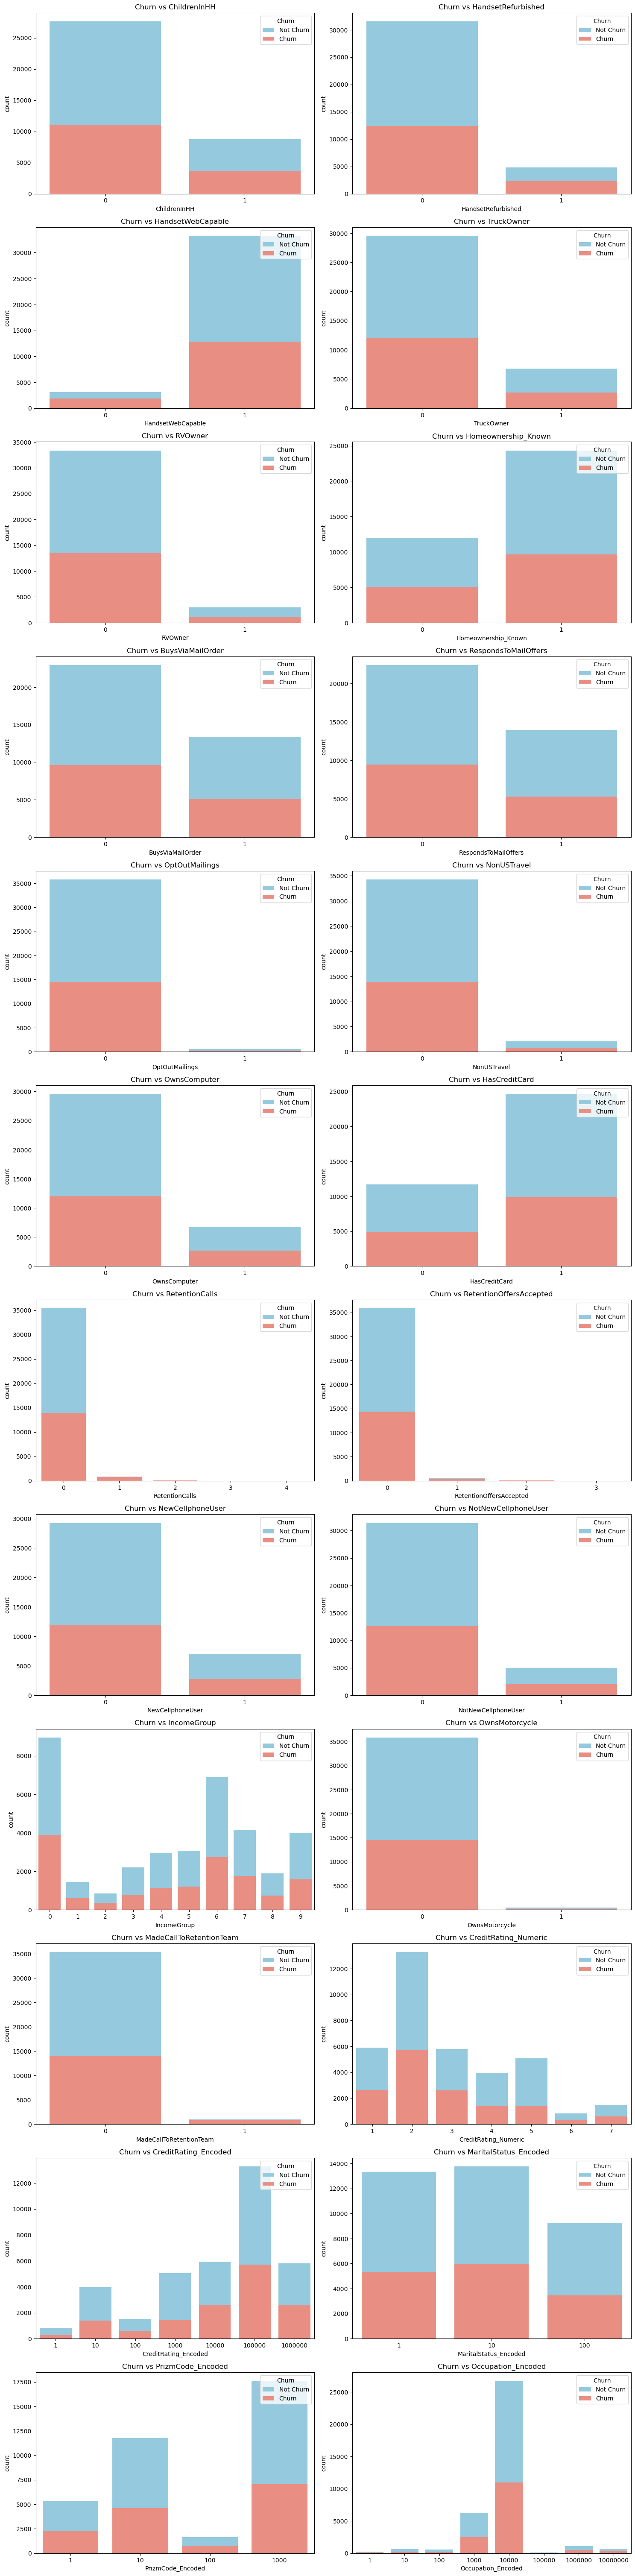

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of columns for subplots
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(categorical) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to handle variable number of subplots
axes = axes.flatten()

# Plot count plots for each feature with respect to 'Churn'
for i, feature in enumerate(categorical[1:]):
    ax = axes[i]
    
    # Plot for Churn = 0
    sns.countplot(x=feature, data=data[data['Churn'] == 0], color='skyblue', label='Not Churn', ax=ax)
    
    # Plot for Churn = 1
    sns.countplot(x=feature, data=data[data['Churn'] == 1], color='salmon', label='Churn', ax=ax)
    
    ax.set_title(f'Churn vs {feature}')
    ax.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
    contingency_table = pd.crosstab(index=data[feature], columns=data['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    plt.xlabel(f'Chi2 = {chi2:.2f}, p-value = {p:.4f}')



# Remove empty subplots if any
for i in range(len(categorical) - 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
    # Display Chi-Squared Test Results below the plot


plt.tight_layout()
plt.show()


In [420]:
import scipy.stats as ss
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

<h1>Chi Test</h1>

In [467]:
import pandas as pd
import scipy.stats as ss

# Loop over the columns, excluding the target variable
chi2_results = {} # create an empty dictionary to store the results
for col in categorical_df.columns.drop('Churn'):
    # Perform chi-square test of independence
    chi2, p, dof, ex = ss.chi2_contingency(pd.crosstab(df[col], df['Churn']))
    # Store the results in the dictionary
    chi2_results[col] = [chi2, p, dof, ex]

# Display the results in a table
chi2_df = pd.DataFrame(chi2_results, index=['Chi-square statistic', 'p-value', 'Degrees of freedom', 'Expected frequencies']) # create a DataFrame from the dictionary
chi2_df = chi2_df.T # transpose the DataFrame



In [468]:
chi2_df

,Chi-square statistic,p-value,Degrees of freedom,Expected frequencies
ChildrenInHH,1.5625,0.991621,8,"[[9.6, 0.4], [2.88, 0.12], [1.92, 0.08], [0.96..."
HandsetRefurbished,0.198413,0.905556,2,"[[20.16, 0.84], [2.88, 0.12], [0.96, 0.04]]"
HandsetWebCapable,0.142045,0.931441,2,"[[21.12, 0.88], [1.92, 0.08], [0.96, 0.04]]"
TruckOwner,1.5625,0.980067,7,"[[9.6, 0.4], [1.92, 0.08], [3.84, 0.16], [3.84..."
RVOwner,1.5625,0.955235,6,"[[9.6, 0.4], [5.76, 0.24], [0.96, 0.04], [3.84..."
Homeownership_Known,1.851852,0.999854,13,"[[8.64, 0.36], [0.96, 0.04], [2.88, 0.12], [1...."
BuysViaMailOrder,1.851852,0.999601,12,"[[8.64, 0.36], [0.96, 0.04], [1.92, 0.08], [1...."
RespondsToMailOffers,1.851852,0.998953,11,"[[8.64, 0.36], [0.96, 0.04], [1.92, 0.08], [2...."
OptOutMailings,0.142045,0.931441,2,"[[21.12, 0.88], [1.92, 0.08], [0.96, 0.04]]"
NonUSTravel,0.961538,0.987028,6,"[[12.48, 0.52], [2.88, 0.12], [3.84, 0.16], [1..."


it seems that none of the categorical features actually have a correlation between the target variable

therefore, based on common guessing, I will drop features that logically should not have a correlation with the targer variable

all commute features will be dropped, wether someone has a motor, an RV, or a truck really shouldnt contribute in someones Churn. 

In [478]:
data.drop(columns=['OwnsMotorcycle'], inplace=True)
data.drop(columns=['TruckOwner'], inplace=True)
data.drop(columns=['RVOwner'], inplace=True)

<h1>Normalizing the Data</h1>

<h1>ANOVA test for Continous Data</h1>

In [494]:
import pandas as pd
import scipy.stats as stats

y = data['Churn']

# Loop over the columns, excluding the target variable
anova_results = {}  # create an empty dictionary to store the results

for col in continuous_df.columns:
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(continuous_df[y == 0][col].dropna(), continuous_df[y == 1][col].dropna())
    
    # Store the results in the dictionary
    anova_results[col] = [f_statistic, p_value]

# Display the results in a table
anova_df = pd.DataFrame(anova_results, index=['F-statistic', 'p-value'])  # create a DataFrame from the dictionary
anova_df = anova_df.T   # transpose the DataFrame
sorted_df = anova_df.sort_values(by='F-statistic', ascending=False)

print(sorted_df)

                                F-statistic        p-value
CurrentEquipmentDays             554.746509  5.244081e-122
TotalRecurringCharge             191.923355   1.451180e-43
MonthlyMinutes                   128.392794   9.996928e-30
OffPeakCallsInOut                 85.045460   3.023358e-20
HandsetModels                     81.996016   1.410338e-19
PeakCallsInOut                    81.921351   1.464547e-19
ReceivedCalls                     71.702023   2.568307e-17
CustomerCareCalls                 64.446534   1.012877e-15
UniqueSubs                        60.907241   6.096051e-15
InboundCalls                      59.887708   1.022644e-14
PercChangeMinutes                 59.352850   1.341756e-14
Handsets                          55.127070   1.147385e-13
OutboundCalls                     53.231479   3.007652e-13
AgeHH1                            44.386483   2.723205e-11
UnansweredCalls                   44.009711   3.300041e-11
CallWaitingCalls                  33.612523   6.765333e-

<b>Highest correlation seems to be that of CurrentEquipmentDays, TotalRecurringCharge, MonthlyMinutes </b>

it seems that continous features mainly contribute more to wether customers churn or not. however, BlockedCalls, CallForwardingCalls, and HandsetPrice seem to be unrelated. </br>
since HandsetPrice already has 28982 out of 51047 records as null anyway,  this feature will be dropped. 


In [477]:
data.drop(columns=['HandsetPrice'], inplace=True)

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           51047 non-null  int32  
 1   MonthlyRevenue                  50891 non-null  float64
 2   MonthlyMinutes                  50891 non-null  float64
 3   TotalRecurringCharge            50891 non-null  float64
 4   DirectorAssistedCalls           50891 non-null  float64
 5   OverageMinutes                  50891 non-null  float64
 6   RoamingCalls                    50891 non-null  float64
 7   PercChangeMinutes               50680 non-null  float64
 8   PercChangeRevenues              50680 non-null  float64
 9   DroppedCalls                    51047 non-null  float64
 10  BlockedCalls                    51047 non-null  float64
 11  UnansweredCalls                 51047 non-null  float64
 12  CustomerCareCalls            

<h1>Handling Missing Values</h1>

In [503]:
# count the number of null values in each column
for column in data.columns:
    if data[column].isnull().sum() != 0:
        print(column, data[column].isnull().sum())

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
SerivceArea_City_Frequency 24
ServiceArea_AreaCode_Frequency 24


In [499]:
# Loop over the columns
for column in data.columns:
    # Count the number of null values in each column
    null_count = data[column].isnull().sum()
    # If the number is not zero, print the column name and the percentage of null values
    if null_count != 0:
        # Calculate the percentage of null values
        null_percentage = null_count / len(data) * 100
        # Print the column name and the percentage, formatted to two decimal places
        print(column, f'{null_percentage:.2f}%')

MonthlyRevenue 0.31%
MonthlyMinutes 0.31%
TotalRecurringCharge 0.31%
DirectorAssistedCalls 0.31%
OverageMinutes 0.31%
RoamingCalls 0.31%
PercChangeMinutes 0.72%
PercChangeRevenues 0.72%
Handsets 0.00%
HandsetModels 0.00%
CurrentEquipmentDays 0.00%
AgeHH1 1.78%
AgeHH2 1.78%
SerivceArea_City_Frequency 0.05%
ServiceArea_AreaCode_Frequency 0.05%


<b>Dropping Columns AgeHH1 and AgeHH2</b>

In [502]:
data.drop(columns=['AgeHH1'], inplace=True)
data.drop(columns=['AgeHH2'], inplace=True)


<b>Dropping records that have Null values</b>

In [ ]:
# Delete the records with missing values for the features with 0.05% or 0.31% of missing values
data = data.dropna(subset=["MonthlyRevenue", "MonthlyMinutes", "TotalRecurringCharge", "DirectorAssistedCalls", 
                           "OverageMinutes", "RoamingCalls", "SerivceArea_City_Frequency", "ServiceArea_AreaCode_Frequency"])

# Impute the missing values for the features with 0.72% of missing values with the mean of the feature
data["PercChangeMinutes"] = data["PercChangeMinutes"].fillna(data["PercChangeMinutes"].mean())
data["PercChangeRevenues"] = data["PercChangeRevenues"].fillna(data["PercChangeRevenues"].mean())

# Check the number of missing values for each feature
data.isnull().sum()

<h1>Feature Selection using Random Forest</h1>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load data into a Pandas DataFrame
df = pd.read_csv('data.csv')

# Separate the features and the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train a random forest classifier on the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract the feature importance scores from the model
importances = rf.feature_importances_

# Print the feature importance scores
print(f'Feature importances: {importances}')

# Create a selector object that will use the random forest classifier to identify the most important features
selector = SelectFromModel(rf, threshold=0.01)

# Train the selector on the data
selector.fit(X, y)

# Print the names of the selected features
selected_features = X.columns[selector.get_support()]
print(f'Selected features: {selected_features}')


In [501]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Separate the features and the target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train a random forest classifier on the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract the feature importance scores from the model
importances = rf.feature_importances_

# Create a series object from the feature importance scores and the feature names
importance_series = pd.Series(importances, index=X.columns)

# Sort the series in descending order
importance_series = importance_series.sort_values(ascending=False)

# Plot the series as a horizontal bar graph
plt.figure(figsize=(10, 8)) # set the figure size
plt.barh(importance_series.index, importance_series.values) # create the bar graph
plt.xlabel('Feature importance') # set the x-axis label
plt.ylabel('Feature name') # set the y-axis label
plt.title('Feature importance scores using random forest') # set the title
plt.show() # show the plot


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values